In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Rutas
ruta_datos = '/content/drive/MyDrive/Laboratorio_3/data/sell-in.txt'
ruta_productos = '/content/drive/MyDrive/Laboratorio_3/data/tb_productos.txt'
ruta_stocks = '/content/drive/MyDrive/Laboratorio_3/data/tb_stocks.txt'
ruta_predecir = '/content/drive/MyDrive/Laboratorio_3/data/product_id_apredecir201912.txt'

#Leer archivos
df = pd.read_csv(ruta_datos, sep='\t', decimal='.')
df_productos = pd.read_csv(ruta_productos, sep='\t', decimal='.')
df_stocks = pd.read_csv(ruta_stocks, sep='\t', decimal='.')
df_predecir = pd.read_csv(ruta_predecir, sep='\t')

In [5]:
#Convertir 'periodo' de formato YYYYMM en df
df['periodo'] = pd.to_datetime(df['periodo'].astype(str), format='%Y%m')

#Crear columna periodo_ym
df['periodo_ym'] = df['periodo'].dt.strftime('%Y%m').astype(int)

## **EDA**

In [6]:
df.head()

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,periodo_ym
0,2017-01-01,10234,20524,0,2,0.05300,0.05300,201701
1,2017-01-01,10032,20524,0,1,0.13628,0.13628,201701
2,2017-01-01,10217,20524,0,1,0.03028,0.03028,201701
3,2017-01-01,10125,20524,0,1,0.02271,0.02271,201701
4,2017-01-01,10012,20524,0,11,1.54452,1.54452,201701


In [7]:
df_productos.head()

,cat1,cat2,cat3,brand,sku_size,product_id
0,HC,ROPA LAVADO,Liquido,LIMPIEX,900,20280
1,HC,ROPA LAVADO,Liquido,LIMPIEX,450,20180
2,HC,ROPA LAVADO,Liquido,LIMPIEX,120,20332
3,HC,ROPA LAVADO,Liquido,LIMPIEX,450,20222
4,HC,ROPA LAVADO,Liquido,LIMPIEX,900,20288


In [8]:
df_stocks.head()

,periodo,product_id,stock_final
0,201810,20524,1.61267
1,201810,20311,2.93657
2,201810,20654,6.83269
3,201810,21005,1.01338
4,201810,20974,0.34595


In [9]:
print('\nValores nulos:\n', df.isnull().sum())
print('\nValores duplicados:\n', df.duplicated().sum())


Valores nulos:
 periodo                  0
customer_id              0
product_id               0
plan_precios_cuidados    0
cust_request_qty         0
cust_request_tn          0
tn                       0
periodo_ym               0
dtype: int64

Valores duplicados:
 0


In [10]:
# Asegurarse de que el campo 'periodo' esté en formato datetime
df["periodo"] = pd.to_datetime(df["periodo"], format="%Y%m")

df['año'] = df['periodo'].dt.year
df['mes'] = df['periodo'].dt.month
# Convertir 'periodo' a string con formato YYYY-MM para el eje x del gráfico
df['mes_año'] = df['periodo'].dt.strftime('%Y-%m')

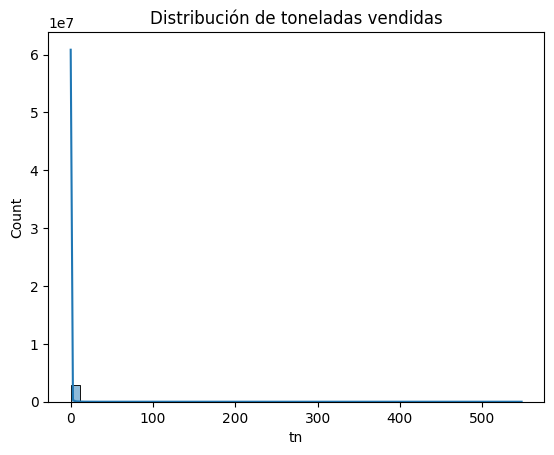

In [ ]:
sns.histplot(df["tn"], bins=50, kde=True)
plt.title("Distribución de toneladas vendidas")
plt.show()

/tmp/ipython-input-13-2631417087.py:27: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(total_foods.index, total_foods.values,


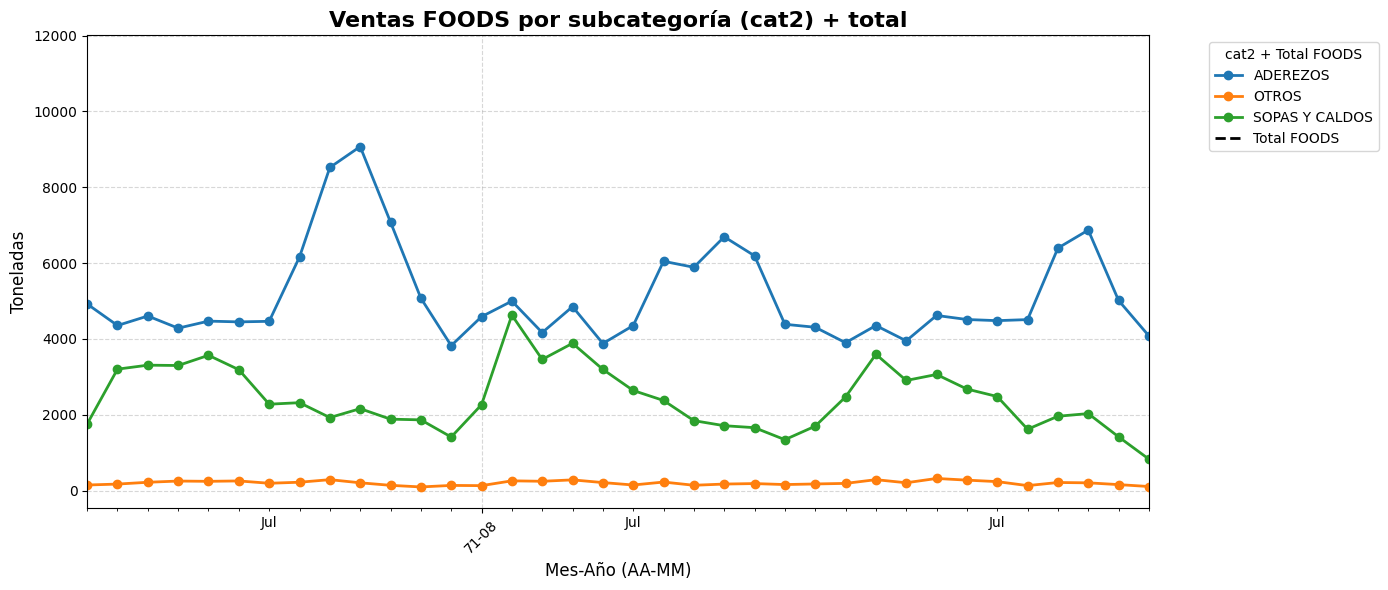

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Asegurar tipos correctos
df["periodo"] = pd.to_datetime(df["periodo"])
df_productos["product_id"] = df_productos["product_id"].astype(df["product_id"].dtype)

# Unir ventas con productos
df_ventas = df.merge(df_productos[["product_id", "cat1", "cat2"]], on="product_id", how="left")

# Filtrar FOODS
df_foods = df_ventas[df_ventas["cat1"] == "FOODS"]

# Agrupar por periodo y cat2
ventas_cat2 = df_foods.groupby(["periodo", "cat2"])["tn"].sum().unstack()

# Total mensual FOODS
total_foods = df_foods.groupby("periodo")["tn"].sum()

# Crear gráfico
fig, ax = plt.subplots(figsize=(14, 6))

# Dibujar las líneas de cat2
ventas_cat2.plot(ax=ax, linewidth=2, marker='o')

# Agregar línea punteada con total
ax.plot(total_foods.index, total_foods.values,
        linestyle='--', color='black', linewidth=2, label='Total FOODS')

# Formateo eje X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Estética
plt.title("Ventas FOODS por subcategoría (cat2) + total", fontsize=16, weight='bold')
plt.xlabel("Mes-Año (AA-MM)", fontsize=12)
plt.ylabel("Toneladas", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="cat2 + Total FOODS", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarse de que el campo 'periodo' esté en formato datetime
df["periodo"] = pd.to_datetime(df["periodo"])

# Obtener todos los product_id únicos
productos = df["product_id"].unique()

# Mostrar en bloques de 50
bloque_tamaño = 50

for i in range(0, len(productos), bloque_tamaño):
    bloque = productos[i:i+bloque_tamaño]

    for prod_id in bloque:
        datos = df[df["product_id"] == prod_id].groupby("periodo")["tn"].sum()

        plt.figure(figsize=(10, 4))
        plt.plot(datos.index, datos.values)
        plt.title(f"Product ID {prod_id} - Toneladas vendidas por mes")
        plt.xlabel("Periodo")
        plt.ylabel("Toneladas")
        plt.grid(True)
        plt.show()

    # Pausa entre bloques para evitar sobrecarga
    input(f"\n🔽 Mostrando productos {i+1} a {i+len(bloque)}. Presioná ENTER para continuar...\n")
